This notebook is based on `5.0-ayw-neural-network.ipynb`

## Aim of this notebook

In this notebook we will use a fully connected neural network with 6 hidden layers with each layer having 1825 nodes. All five dataset will be examined separately.

## Results

The simple neural network is unable to detect degradation rates from a normalised power signal to any reasonable precision for all datasets except for basic. This time some minimal preprocessing is used.

Again the soil_weather_extra dataset seem to perform better than soil, weather, or soil_weather. This is probably since soil, weather, and soil_weather datasets don't have enough signals to train in a meaningful way.

As a consequence such neural network can't be used as a stand-alone tool to analyse degradation, however it might be useful in a CODS like pipline, where other methods are used to clean up the data passed to the neural network.

## Imports

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext tensorboard

import os
import datetime
import pickle

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error

import tensorflow as tf

from src.models.prepare_model import load_PI_data, split_data_training, create_fully_connected_model
from src.models.train_model import train_model
from src.models.predict_model import load_and_predict_model

tf.random.set_seed(42)
np.random.seed(42)

In [2]:
def extract_yr_degrad(avg_power_decay):
    x = np.array([i/365 for i in range(0,len(avg_power_decay))])
    y = np.array(avg_power_decay)
    return np.polyfit(x,y,1)[0]

## Test soil and weather

In [3]:
# Set up the variables
datasets = [
    ('../data/processed/synthetic_soil_weather_pi_daily.zip', 'soil_weather', 50),
    ('../data/processed/synthetic_soil_weather_pi_daily_extra.zip', 'soil_weather_extra', 100)
]

name = 'fc_6_layers_pre_soil_weather'
signal_length = 1825
nr_epochs = 1000
hidden_layers = [signal_length] * 5

In [4]:
# Read in data
X = np.empty((0, signal_length), float)
y = np.empty((0, signal_length), float)

for dataset in datasets:  
    # Read in the data
    X_new, y_new = load_PI_data(dataset[0], dataset[2], 5)
    X = np.vstack([X, X_new])
    y = np.vstack([y, y_new])

# Preprocess the data
for i, x in enumerate(X):
    temp = pd.Series(x).rolling(15).apply(np.median, raw=True)
    X[i, :] = temp.bfill()
    
X_train, X_valid, X_test, y_train, y_valid, y_test = split_data_training(X, y)
X_tests[dataset[1]] = X_test
y_tests[dataset[1]] = y_test

# Create the model
model = create_fully_connected_model(signal_length, signal_length, hidden_layers)
model_name = name

# Get run index
run_index_path = "./checkpoint/run_index"

with open(run_index_path, 'r') as f:
    run_index = int(f.readline())
run_index += 1
with open(run_index_path, 'w') as f:
    f.write(str(run_index))
    
# Train the model
checpoint_path = train_model(model,
                             X_train,
                             y_train,
                             X_valid,
                             y_valid,
                             run_index,
                             model_name,
                             "./log/" + 'total_soil_weather',
                             "./checkpoint/" + 'total_soil_weather',
                             nr_epochs,
                             save_freq=100)
print(f"Checkpoint for {dataset[1]} dataset is at {checpoint_path}")
    
# Predict on 
prediction = load_and_predict_model(checpoint_path, X_test)

Epoch 1/1000
4/4 [==============================] - 1s 141ms/step - loss: 0.2875 - val_loss: 0.3055
Epoch 2/1000
4/4 [==============================] - 0s 80ms/step - loss: 0.2584 - val_loss: 0.3812
Epoch 3/1000
4/4 [==============================] - 0s 78ms/step - loss: 0.2361 - val_loss: 0.4285
Epoch 4/1000
4/4 [==============================] - 0s 82ms/step - loss: 0.2262 - val_loss: 0.4972
Epoch 5/1000
4/4 [==============================] - 0s 83ms/step - loss: 0.2167 - val_loss: 0.5310
Epoch 6/1000
4/4 [==============================] - 0s 80ms/step - loss: 0.2068 - val_loss: 0.5385
Epoch 7/1000
4/4 [==============================] - 0s 82ms/step - loss: 0.1942 - val_loss: 0.5089
Epoch 8/1000
4/4 [==============================] - 0s 81ms/step - loss: 0.1778 - val_loss: 0.4397
Epoch 9/1000
4/4 [==============================] - 0s 81ms/step - loss: 0.1586 - val_loss: 0.5567
Epoch 10/1000
4/4 [==============================] - 0s 85ms/step - loss: 0.1411 - val_loss: 0.5112
Epoch 11

Epoch 80/1000
4/4 [==============================] - 0s 82ms/step - loss: 1.0430e-04 - val_loss: 1.2588e-04
Epoch 81/1000
4/4 [==============================] - 0s 82ms/step - loss: 1.0290e-04 - val_loss: 1.2261e-04
Epoch 82/1000
4/4 [==============================] - 1s 146ms/step - loss: 1.0453e-04 - val_loss: 1.2250e-04
Epoch 83/1000
4/4 [==============================] - 0s 82ms/step - loss: 1.0448e-04 - val_loss: 1.2206e-04
Epoch 84/1000
4/4 [==============================] - 0s 81ms/step - loss: 1.0656e-04 - val_loss: 1.2148e-04
Epoch 85/1000
4/4 [==============================] - 0s 82ms/step - loss: 9.6207e-05 - val_loss: 1.1815e-04
Epoch 86/1000
4/4 [==============================] - 0s 81ms/step - loss: 1.0171e-04 - val_loss: 1.1008e-04
Epoch 87/1000
4/4 [==============================] - 0s 79ms/step - loss: 9.9825e-05 - val_loss: 1.1622e-04
Epoch 88/1000
4/4 [==============================] - 0s 81ms/step - loss: 9.4303e-05 - val_loss: 1.2203e-04
Epoch 89/1000
4/4 [========

4/4 [==============================] - 0s 81ms/step - loss: 5.3041e-05 - val_loss: 9.8689e-05
Epoch 156/1000
4/4 [==============================] - 0s 82ms/step - loss: 5.2476e-05 - val_loss: 8.1362e-05
Epoch 157/1000
4/4 [==============================] - 0s 84ms/step - loss: 4.1402e-05 - val_loss: 7.7084e-05
Epoch 158/1000
4/4 [==============================] - 0s 82ms/step - loss: 4.2235e-05 - val_loss: 7.0194e-05
Epoch 159/1000
4/4 [==============================] - 0s 85ms/step - loss: 3.8539e-05 - val_loss: 7.6796e-05
Epoch 160/1000
4/4 [==============================] - 0s 81ms/step - loss: 3.9589e-05 - val_loss: 6.9961e-05
Epoch 161/1000
4/4 [==============================] - 0s 79ms/step - loss: 3.5882e-05 - val_loss: 8.2281e-05
Epoch 162/1000
4/4 [==============================] - 0s 80ms/step - loss: 4.2669e-05 - val_loss: 8.3244e-05
Epoch 163/1000
4/4 [==============================] - 0s 81ms/step - loss: 4.3810e-05 - val_loss: 8.1643e-05
Epoch 164/1000
4/4 [==============

4/4 [==============================] - 0s 78ms/step - loss: 2.9906e-05 - val_loss: 1.3450e-04
Epoch 231/1000
4/4 [==============================] - 0s 81ms/step - loss: 4.1691e-05 - val_loss: 7.4382e-05
Epoch 232/1000
4/4 [==============================] - 0s 79ms/step - loss: 2.8314e-05 - val_loss: 7.0679e-05
Epoch 233/1000
4/4 [==============================] - 0s 81ms/step - loss: 3.0693e-05 - val_loss: 8.7223e-05
Epoch 234/1000
4/4 [==============================] - 0s 79ms/step - loss: 2.2732e-05 - val_loss: 6.8642e-05
Epoch 235/1000
4/4 [==============================] - 0s 83ms/step - loss: 3.9776e-05 - val_loss: 7.1957e-05
Epoch 236/1000
4/4 [==============================] - 0s 80ms/step - loss: 2.8823e-05 - val_loss: 1.1315e-04
Epoch 237/1000
4/4 [==============================] - 0s 79ms/step - loss: 2.6292e-05 - val_loss: 8.6825e-05
Epoch 238/1000
4/4 [==============================] - 0s 79ms/step - loss: 2.1376e-05 - val_loss: 5.6340e-05
Epoch 239/1000
4/4 [==============

4/4 [==============================] - 0s 84ms/step - loss: 2.4690e-05 - val_loss: 6.7713e-05
Epoch 306/1000
4/4 [==============================] - 0s 80ms/step - loss: 2.2003e-05 - val_loss: 6.2879e-05
Epoch 307/1000
4/4 [==============================] - 0s 83ms/step - loss: 2.7395e-05 - val_loss: 6.2923e-05
Epoch 308/1000
4/4 [==============================] - 0s 82ms/step - loss: 3.8080e-05 - val_loss: 9.6236e-05
Epoch 309/1000
4/4 [==============================] - 0s 82ms/step - loss: 2.8870e-05 - val_loss: 5.6394e-05
Epoch 310/1000
4/4 [==============================] - 0s 81ms/step - loss: 3.1080e-05 - val_loss: 5.8833e-05
Epoch 311/1000
4/4 [==============================] - 0s 81ms/step - loss: 2.1795e-05 - val_loss: 7.3861e-05
Epoch 312/1000
4/4 [==============================] - 0s 81ms/step - loss: 2.4572e-05 - val_loss: 5.2974e-05
Epoch 313/1000
4/4 [==============================] - 0s 83ms/step - loss: 1.6614e-05 - val_loss: 5.2121e-05
Epoch 314/1000
4/4 [==============

4/4 [==============================] - 0s 79ms/step - loss: 1.3567e-05 - val_loss: 7.6513e-05
Epoch 381/1000
4/4 [==============================] - 0s 79ms/step - loss: 8.0120e-06 - val_loss: 6.5868e-05
Epoch 382/1000
4/4 [==============================] - 0s 82ms/step - loss: 1.2301e-05 - val_loss: 5.8529e-05
Epoch 383/1000
4/4 [==============================] - 0s 86ms/step - loss: 1.6571e-05 - val_loss: 5.3598e-05
Epoch 384/1000
4/4 [==============================] - 0s 81ms/step - loss: 1.5129e-05 - val_loss: 5.3361e-05
Epoch 385/1000
4/4 [==============================] - 0s 77ms/step - loss: 1.1116e-05 - val_loss: 5.9892e-05
Epoch 386/1000
4/4 [==============================] - 0s 85ms/step - loss: 1.1764e-05 - val_loss: 5.3693e-05
Epoch 387/1000
4/4 [==============================] - 0s 82ms/step - loss: 1.5111e-05 - val_loss: 7.4146e-05
Epoch 388/1000
4/4 [==============================] - 0s 79ms/step - loss: 1.3290e-05 - val_loss: 6.7434e-05
Epoch 389/1000
4/4 [==============

4/4 [==============================] - 0s 80ms/step - loss: 1.7336e-05 - val_loss: 9.0367e-05
Epoch 456/1000
4/4 [==============================] - 0s 81ms/step - loss: 1.3314e-05 - val_loss: 6.4406e-05
Epoch 457/1000
4/4 [==============================] - 0s 80ms/step - loss: 1.6528e-05 - val_loss: 5.7387e-05
Epoch 458/1000
4/4 [==============================] - 0s 81ms/step - loss: 1.1162e-05 - val_loss: 5.6438e-05
Epoch 459/1000
4/4 [==============================] - 0s 81ms/step - loss: 1.5676e-05 - val_loss: 7.6468e-05
Epoch 460/1000
4/4 [==============================] - 0s 80ms/step - loss: 1.6805e-05 - val_loss: 5.8013e-05
Epoch 461/1000
4/4 [==============================] - 0s 82ms/step - loss: 2.1641e-05 - val_loss: 6.2527e-05
Epoch 462/1000
4/4 [==============================] - 0s 80ms/step - loss: 1.2170e-05 - val_loss: 1.0580e-04
Epoch 463/1000
4/4 [==============================] - 0s 80ms/step - loss: 1.7693e-05 - val_loss: 1.2227e-04
Epoch 464/1000
4/4 [==============

4/4 [==============================] - 0s 81ms/step - loss: 1.4109e-05 - val_loss: 9.0845e-05
Epoch 531/1000
4/4 [==============================] - 0s 81ms/step - loss: 2.4674e-05 - val_loss: 1.3649e-04
Epoch 532/1000
4/4 [==============================] - 0s 80ms/step - loss: 1.4529e-05 - val_loss: 5.9110e-05
Epoch 533/1000
4/4 [==============================] - 0s 84ms/step - loss: 2.7543e-05 - val_loss: 1.1989e-04
Epoch 534/1000
4/4 [==============================] - 0s 82ms/step - loss: 2.8157e-05 - val_loss: 9.5847e-05
Epoch 535/1000
4/4 [==============================] - 0s 84ms/step - loss: 1.7335e-05 - val_loss: 9.0237e-05
Epoch 536/1000
4/4 [==============================] - 0s 82ms/step - loss: 1.7051e-05 - val_loss: 1.0051e-04
Epoch 537/1000
4/4 [==============================] - 0s 85ms/step - loss: 1.4984e-05 - val_loss: 9.8096e-05
Epoch 538/1000
4/4 [==============================] - 0s 81ms/step - loss: 1.2783e-05 - val_loss: 1.5332e-04
Epoch 539/1000
4/4 [==============

4/4 [==============================] - 0s 79ms/step - loss: 1.5824e-05 - val_loss: 5.4474e-05
Epoch 606/1000
4/4 [==============================] - 0s 80ms/step - loss: 1.1410e-05 - val_loss: 7.5868e-05
Epoch 607/1000
4/4 [==============================] - 0s 79ms/step - loss: 1.6191e-05 - val_loss: 6.7797e-05
Epoch 608/1000
4/4 [==============================] - 0s 84ms/step - loss: 2.0983e-05 - val_loss: 9.5270e-05
Epoch 609/1000
4/4 [==============================] - 0s 82ms/step - loss: 1.5410e-05 - val_loss: 5.8262e-05
Epoch 610/1000
4/4 [==============================] - 0s 83ms/step - loss: 1.4740e-05 - val_loss: 5.8349e-05
Epoch 611/1000
4/4 [==============================] - 0s 84ms/step - loss: 1.3843e-05 - val_loss: 6.8292e-05
Epoch 612/1000
4/4 [==============================] - 0s 88ms/step - loss: 1.5290e-05 - val_loss: 5.4889e-05
Epoch 613/1000
4/4 [==============================] - 0s 87ms/step - loss: 1.9336e-05 - val_loss: 5.8268e-05
Epoch 614/1000
4/4 [==============

In [5]:
# Find RMSE
model_pred = []
degradation_rates_test = []
for i in range(0, len(prediction)):
    model_pred.append(extract_yr_degrad(prediction[i, :]))
    degradation_rates_test.append(extract_yr_degrad(y_test[i]))
mse = mean_squared_error(model_pred, degradation_rates_test)
    
rmse = np.sqrt(mse)
print(f"RMSE for soil and weather dataset is at {rmse*100:0.3f}%/yr")

RMSE for soil and weather dataset is at 0.379%/yr


In [6]:
# Find RMSE by simply guessing a constant value

mse = mean_squared_error([np.mean(degradation_rates_test)] * len(degradation_rates_test), degradation_rates_test)
rmse = np.sqrt(mse)
print(f"RMSE for soil and weather dataset obtained by always guessing {np.mean(degradation_rates_test)*100:0.3f}%/yr is {rmse*100:0.3f}%/yr")

RMSE for soil and weather dataset obtained by always guessing -1.027%/yr is 0.321%/yr


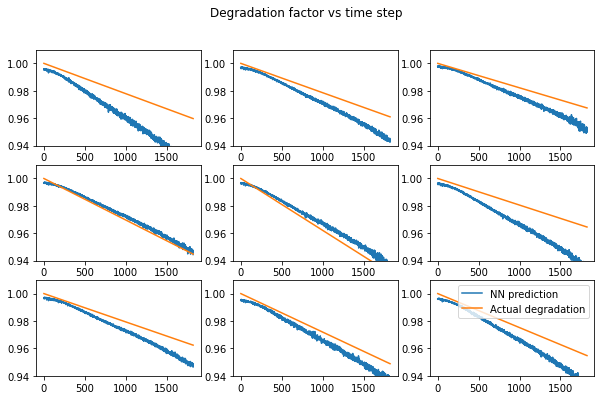

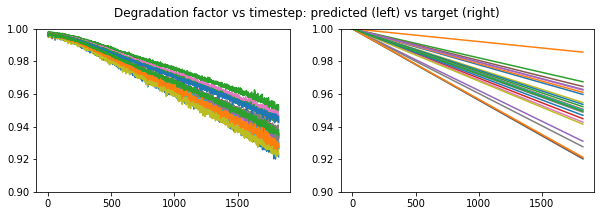

In [7]:
# Visualizing the predictions.
plt.figure(figsize=(10,6))
plt.tight_layout()
plt.suptitle("Degradation factor vs time step")
for i in range(0, min(len(prediction), 9)):
    plt.subplot(3,3,i+1)
    plt.ylim(0.94,1.01)
    plt.plot([x for x in prediction[i]])
    plt.plot([x for x in y_test[i]])
plt.legend(['NN prediction','Actual degradation'])
plt.show()

plt.figure(figsize=(10,3))
plt.suptitle("Degradation factor vs timestep: predicted (left) vs target (right)")
plt.subplot(1,2,1)
plt.ylim(0.90,1)
for i in range(0,len(prediction)):
    plt.plot(prediction[i])
plt.subplot(1,2,2)
plt.ylim(0.90,1)
for i in range(0,len(y_test)):
    plt.plot(y_test[i])
plt.show()

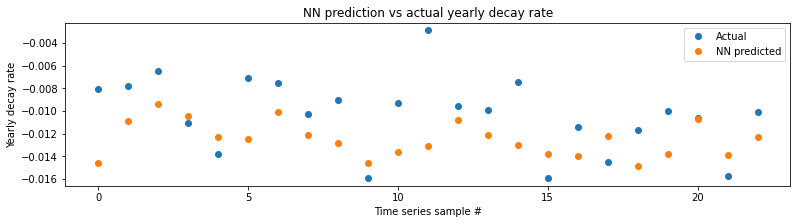

In [8]:
plt.figure(figsize=(13,3))
plt.plot(degradation_rates_test, 'o')
plt.plot(model_pred, 'o')
plt.xlabel("Time series sample #")
plt.ylabel("Yearly decay rate")
plt.title("NN prediction vs actual yearly decay rate")
plt.legend(["Actual","NN predicted"])
plt.show()

## Scale the predicitions

In [9]:
# Scale the predicted results using the difference between the means of actual and predicted values for validation set
prediction_valid = load_and_predict_model(checpoint_path, X_valid)

model_pred_valid = []
degradation_rates_valid = []
for i in range(0, len(prediction_valid)):
    model_pred_valid.append(extract_yr_degrad(prediction_valid[i, :]))
    degradation_rates_valid.append(extract_yr_degrad(y_valid[i]))

In [10]:
scaling_diff = np.mean(degradation_rates_valid) - np.mean(model_pred_valid)
print(scaling_diff)

0.002464486255977503


In [11]:
mse = mean_squared_error(np.array(model_pred) + scaling_diff, degradation_rates_test)
rmse = np.sqrt(mse)
print(f"Scalled RMSE for soil and weather dataset is {rmse*100:0.3f}%/yr")

Scalled RMSE for soil and weather dataset is 0.305%/yr


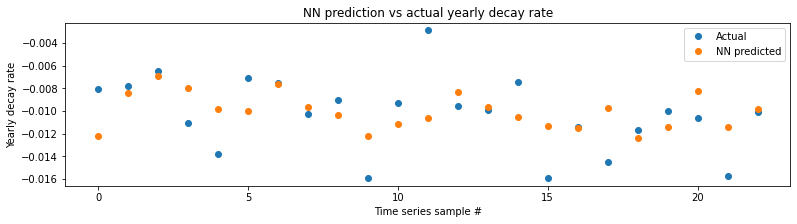

In [12]:
plt.figure(figsize=(13,3))
plt.plot(degradation_rates_test, 'o')
plt.plot(np.array(model_pred) + scaling_diff, 'o')
plt.xlabel("Time series sample #")
plt.ylabel("Yearly decay rate")
plt.title("NN prediction vs actual yearly decay rate")
plt.legend(["Actual","NN predicted"])
plt.show()